In [26]:
import pandas as pd
import numpy as np
train_data=pd.read_csv("train_data.txt",sep=':::',names=['ID','Title','Genre','Summary'],engine='python')
test_data=pd.read_csv("test_data.txt",sep=':::',names=['ID','Title','Summary'],engine='python')
print(train_data.head())
test_data.head()

   ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                             Summary  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


,ID,Title,Summary
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
print(train_data.shape)
print(test_data.shape)
print(train_data.isnull())
print(train_data.isnull().sum())

(3178, 4)
(3260, 3)
         ID  Title  Genre  Summary
0     False  False  False    False
1     False  False  False    False
2     False  False  False    False
3     False  False  False    False
4     False  False  False    False
...     ...    ...    ...      ...
3173  False  False  False    False
3174  False  False  False    False
3175  False  False  False    False
3176  False  False  False    False
3177  False  False  False    False

[3178 rows x 4 columns]
ID         0
Title      0
Genre      0
Summary    0
dtype: int64


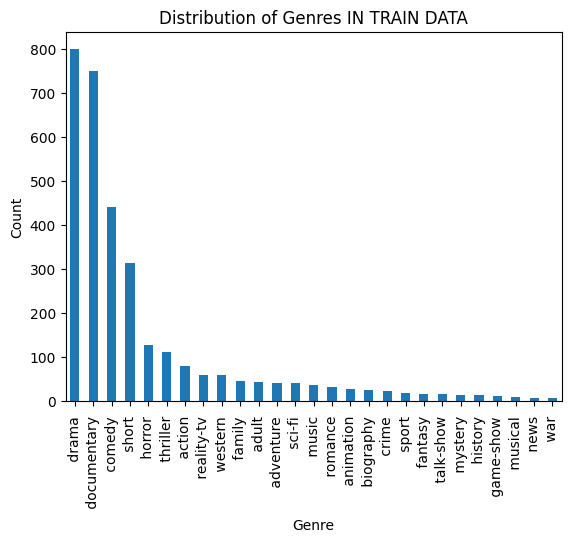

In [49]:
import matplotlib.pyplot as plt
train_data['Genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres IN TRAIN DATA')
plt.show()


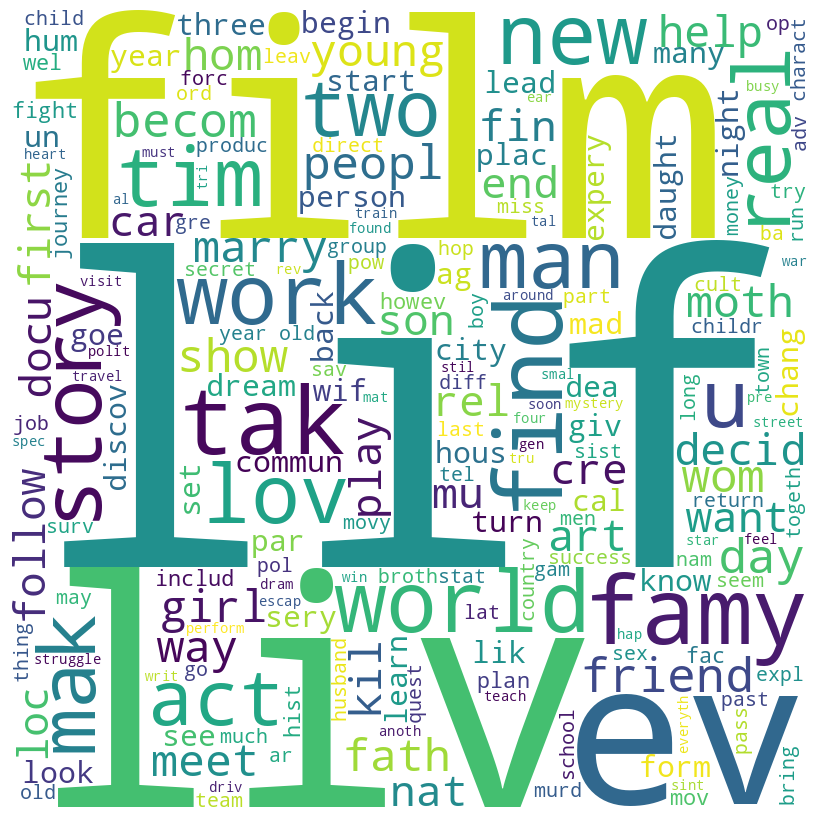

In [42]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(train_data['Clean text'])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
# shows the most FREQUENT WORDS IN OUR DATASET

In [6]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
#clean data
# cleaning the data using nltk library
from nltk import LancasterStemmer
import re
import nltk
from nltk.corpus import stopwords
stemmer = LancasterStemmer()
stop_words_set = set(stopwords.words('english'))
def clean_data(data):
  data=data.upper()
  data=re.sub(r'[^a-zA-Z]',' ',data)
  data = re.sub(r'\s+@\s+','',data)
  data = re.sub(r'http\S+', '',data)
  data=re.sub(r'@\s+','',data)
  words = nltk.word_tokenize(data)
  data=[stemmer.stem(word) for word in words if word.lower() not in stop_words_set]
  data=' '.join(data)
  return data
train_data['Clean text']=train_data['Summary'].apply(clean_data)
# test_data['Clean text']=test_data['Summary'].apply(clean_data)

In [28]:
train_data.head()

,ID,Title,Genre,Summary,Clean text
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,list convers doct par year old osc learn nobod...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,broth sist past incestu rel cur murd rel murd ...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty stud field trip muse nat hist littl ...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy fath mak end meet edi twin sist ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl ref un recov body ground zero also s...


In [29]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vector.fit_transform(train_data['Clean text'])

# Transform the test data
# X_test = tfidf_vector.transform(test_data['Clean text'])
print(X_train.shape)
# print(X_test.shape)
print(X_train.toarray())
# print(X_test)

(3178, 15694)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
X = X_train
y = train_data['Genre']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3,random_state=42)
# Initialize and train a Multinomial Naive Bayes classifier
model = SVC(kernel='linear')
model.fit(X_train1, y_train1)

# Make predictions on the validation set
y_pred = model.predict(X_test1)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test1, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test1, y_pred))
y_pred

Validation Accuracy: 0.48427672955974843
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        22
       adult        0.00      0.00      0.00        13
   adventure        0.00      0.00      0.00        12
   animation        0.00      0.00      0.00         7
   biography        0.00      0.00      0.00         7
      comedy        0.42      0.48      0.45       120
       crime        0.00      0.00      0.00        12
 documentary        0.55      0.84      0.67       234
       drama        0.44      0.78      0.56       236
      family        0.00      0.00      0.00        16
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         5
     history        0.00      0.00      0.00         5
      horror        0.67      0.12      0.21        32
       music        0.00      0.00      0.00        19
     musical        0.00      0.00      0.00         4
     mystery        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([' documentary ', ' drama ', ' documentary ', ' drama ', ' drama ',
       ' comedy ', ' drama ', ' documentary ', ' documentary ',
       ' documentary ', ' documentary ', ' documentary ', ' documentary ',
       ' documentary ', ' drama ', ' comedy ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' comedy ', ' drama ',
       ' drama ', ' comedy ', ' documentary ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' drama ', ' comedy ',
       ' short ', ' comedy ', ' documentary ', ' drama ', ' western ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' western ',
       ' documentary ', ' drama ', ' short ', ' documentary ',
       ' documentary ', ' documentary ', ' drama ', ' documentary ',
       ' documentary ', ' drama ', ' documentary ', ' drama ', ' drama ',
       ' drama ', ' documentary ', ' drama ', ' drama ', ' documentary ',
       ' documentary ', ' documentary ', ' documentary ', ' drama ',
       ' documentary '

In [45]:

#WORKING WITH THE GIVEN TEST DATA AND PREDICTING GENRE
test_data.head()
test_data["clean_text"]=test_data["Summary"].apply(clean_data)
test_data.head()
test_data1=tfidf_vector.transform(test_data["clean_text"])
test_data1
test_data["genre"]=model.predict(test_data1)
print(test_data.head())


,ID,Title,Summary,clean_text,genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r bran lov lif car apart job espec girlfrien...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belong w...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,on year lif albin famy shepherd nor transylvan...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",fath died spok broth year sery cant diego tal ...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern mart art superst bruc lee appear ...,documentary


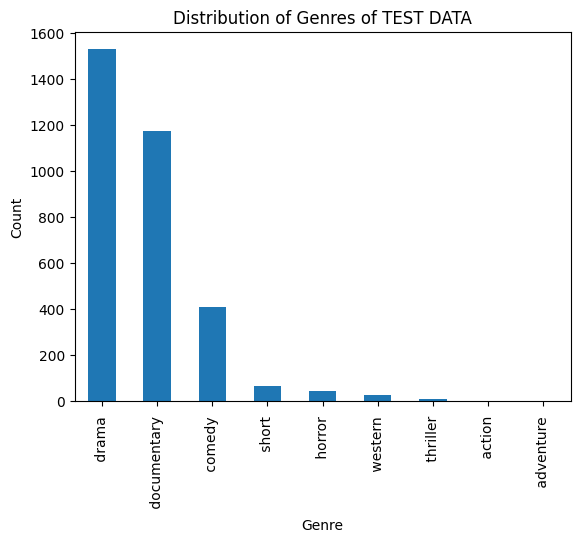

In [48]:
# plot of genre prediction
test_data['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres of TEST DATA')
plt.show()